In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from scipy import special 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math


sns.set(style="whitegrid")
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# import scaling library
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import libraries for logistic regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import libraries for Precision & Recall
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
churn_df = pd.read_csv('telecom_churn_data.csv')

In [3]:
churn_df.shape

(99999, 226)

In [4]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# Data Preparation

In [7]:
# Check missing values for recharge columns
# Let us first extract list of columns containing recharge amount
recharge_columns =  churn_df.columns[churn_df.columns.str.contains('rech_amt|rech_data')]
recharge_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], dtype='object')

In [8]:
# Check missing values percentages for recharge columns
churn_df_null = 100*churn_df.loc[:,recharge_columns].isnull().sum()/len(churn_df)
rec_df = pd.DataFrame(churn_df_null)
rec_df.rename(columns={0:'Null_Per'}, inplace=True)
display(rec_df)

,Null_Per
total_rech_amt_6,0.000000
total_rech_amt_7,0.000000
total_rech_amt_8,0.000000
total_rech_amt_9,0.000000
max_rech_amt_6,0.000000
max_rech_amt_7,0.000000
max_rech_amt_8,0.000000
max_rech_amt_9,0.000000
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744


In [9]:
# Impute missing values
churn_df['total_rech_data_6'] = churn_df['total_rech_data_6'].replace(np.NaN,0)
churn_df['total_rech_data_7'] = churn_df['total_rech_data_7'].replace(np.NaN,0)
churn_df['total_rech_data_8'] = churn_df['total_rech_data_8'].replace(np.NaN,0)

In [10]:
churn_df['av_rech_amt_data_6'] = churn_df['av_rech_amt_data_6'].replace(np.NaN,0)
churn_df['av_rech_amt_data_7'] = churn_df['av_rech_amt_data_7'].replace(np.NaN,0)
churn_df['av_rech_amt_data_8'] = churn_df['av_rech_amt_data_8'].replace(np.NaN,0)

In [11]:
#Check the null values post imputation
round(100*(churn_df.isnull().sum()/len(churn_df.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [12]:
# Finding High Value customers 
churn_df['total_rech_amt_data_6'] = churn_df.av_rech_amt_data_6 * churn_df.total_rech_data_6
churn_df['total_rech_amt_data_7'] = churn_df.av_rech_amt_data_7 * churn_df.total_rech_data_7
churn_df['total_rech_amt_data_8'] = churn_df.av_rech_amt_data_8 * churn_df.total_rech_data_8

In [13]:
churn_df['total_avg_rech_amt_6_7'] = (churn_df.total_rech_amt_6 + churn_df.total_rech_amt_data_6 \
                                               + churn_df.total_rech_amt_7 + churn_df.total_rech_amt_data_7)/2

# Filter High Value Customers

In [14]:
# filter for values greater than 70th percentile of total average recharge amount for the 6-7th months i.e. the good phase 
high_value_cust = churn_df.total_avg_rech_amt_6_7.quantile(0.7)

print('70th percentile of 6th and 7th months avg recharge amount for high value customers: '+str(high_value_cust))

churn_df_high_val_cust = churn_df[churn_df.total_avg_rech_amt_6_7 > high_value_cust]
churn_df_high_val_cust.shape

70th percentile of 6th and 7th months avg recharge amount for high value customers: 478.0


(29953, 230)

In [15]:
high_value_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [16]:
# Checking the null values for the 9th month churn phase
df_9 = 100*churn_df_high_val_cust.loc[:,high_value_cust_9].isnull().sum()/len(churn_df_high_val_cust)
df_9 = pd.DataFrame(df_9)
df_9.rename(columns={0:'Null_Per'}, inplace=True)
df_9

,Null_Per
total_ic_mou_9,0.0
total_og_mou_9,0.0
vol_2g_mb_9,0.0
vol_3g_mb_9,0.0


In [17]:
# Initialise all the values to 0
churn_df_high_val_cust['churn']= 0

In [18]:
#ischurned flag for customers
ischurned = (churn_df_high_val_cust.total_ic_mou_9 == 0) & \
             (churn_df_high_val_cust.total_og_mou_9 == 0) & \
             (churn_df_high_val_cust.vol_2g_mb_9 ==0) & \
             (churn_df_high_val_cust.vol_3g_mb_9 ==0)

In [19]:
# set all which having ischurned True condition = 1
churn_df_high_val_cust.loc[ischurned,'churn']=1

In [20]:
# % of churned customers
100*churn_df_high_val_cust.churn.sum()/len(churn_df_high_val_cust)

8.122725603445398

In [21]:
# Remove all the month 9 attributes i.e. churn phase
churn_mth_columns =  churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('_9')]

In [22]:

churn_df_high_val_cust.drop(churn_mth_columns,axis=1,inplace=True)

In [23]:
churn_df_high_val_cust.shape

(29953, 177)

# EDA on the data and Data Cleaning

In [24]:
round(100*(churn_df_high_val_cust.isnull().sum()/len(churn_df_high_val_cust.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.81
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.81
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

In [25]:
# remove the columns with high missing values
churn_df_high_val_cust = churn_df_high_val_cust.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_8'],axis = 1)

In [26]:
# remove the columns having only one unique value
churn_df_high_val_cust.nunique().astype(int)

mobile_number               29953
circle_id                       1
last_date_of_month_6            1
last_date_of_month_7            1
arpu_6                      29029
arpu_7                      29040
arpu_8                      28035
onnet_mou_6                 16872
onnet_mou_7                 16973
onnet_mou_8                 15854
offnet_mou_6                21198
offnet_mou_7                21233
offnet_mou_8                20140
roam_ic_mou_6                4045
roam_ic_mou_7                3381
roam_ic_mou_8                3431
roam_og_mou_6                4742
roam_og_mou_7                3988
roam_og_mou_8                3996
loc_og_t2t_mou_6            10416
loc_og_t2t_mou_7            10388
loc_og_t2t_mou_8            10056
loc_og_t2m_mou_6            15607
loc_og_t2m_mou_7            15659
loc_og_t2m_mou_8            15118
loc_og_t2f_mou_6             3089
loc_og_t2f_mou_7             3097
loc_og_t2f_mou_8             2988
loc_og_t2c_mou_6             1682
loc_og_t2c_mou

In [27]:
# remove the columns with only 1 unique value
churn_df_high_val_cust = churn_df_high_val_cust.drop(['circle_id', 'last_date_of_month_6', 'last_date_of_month_7','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis = 1)

In [28]:
churn_df_high_val_cust.shape

(29953, 164)

In [29]:
# Get the object type variables for checking the date variables.All date variables are object type
churn_df_high_val_cust.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            

In [30]:
date_columns =  churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('date')]
date_columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], dtype='object')

In [31]:
for col in date_columns:
    churn_df_high_val_cust[col] = pd.to_datetime(churn_df_high_val_cust[col])

In [32]:
churn_df_high_val_cust[date_columns].head(5)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
23,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06


In [33]:
#All dates have been converted to date format
churn_df_high_val_cust.dtypes

mobile_number                        int64
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou_8                      float64
roam_og_mou_6                      float64
roam_og_mou_7                      float64
roam_og_mou_8                      float64
loc_og_t2t_mou_6                   float64
loc_og_t2t_mou_7                   float64
loc_og_t2t_mou_8                   float64
loc_og_t2m_mou_6                   float64
loc_og_t2m_mou_7                   float64
loc_og_t2m_mou_8                   float64
loc_og_t2f_mou_6                   float64
loc_og_t2f_

In [34]:
# create box plot for  6th, 7th and 8th month
def box_plot_eda(attribute):
    plt.figure(figsize=(20,16))
    df = churn_df_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("Set1"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("Set1"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("Set1"))
    plt.show()

In [35]:
recharge_amt_columns =  churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('rech_amt')]
recharge_amt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8', 'total_avg_rech_amt_6_7'], dtype='object')

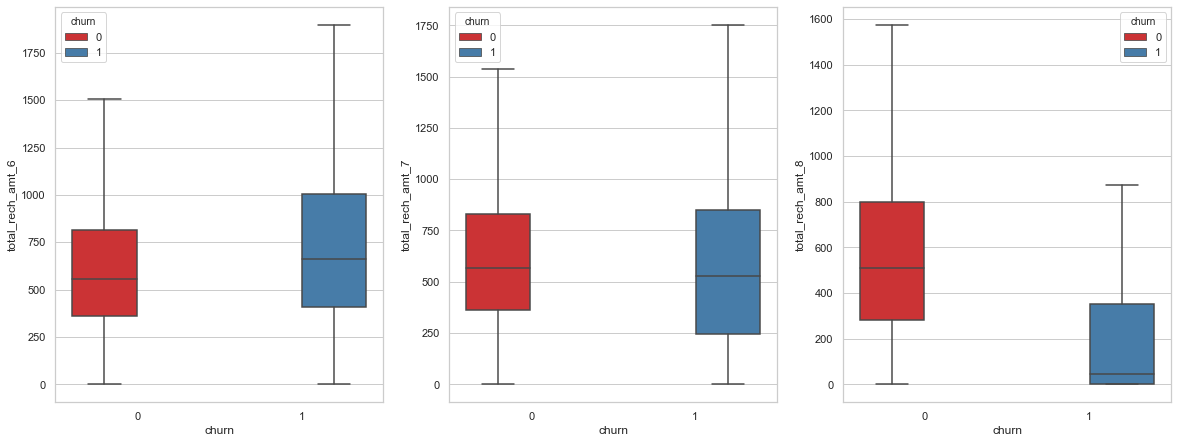

In [36]:
# Ploting for total recharge amount:
box_plot_eda('total_rech_amt')

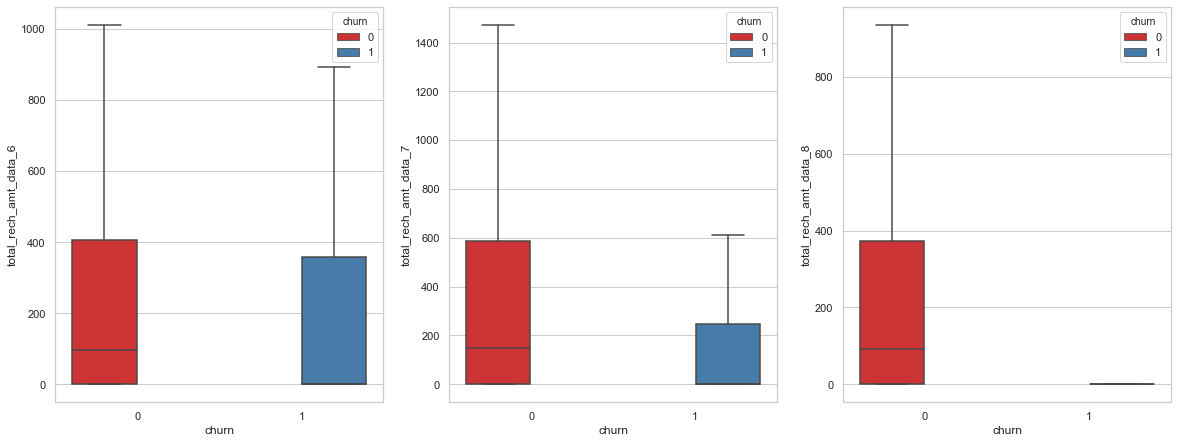

In [37]:
# Ploting for total recharge amount for data:
box_plot_eda('total_rech_amt_data')

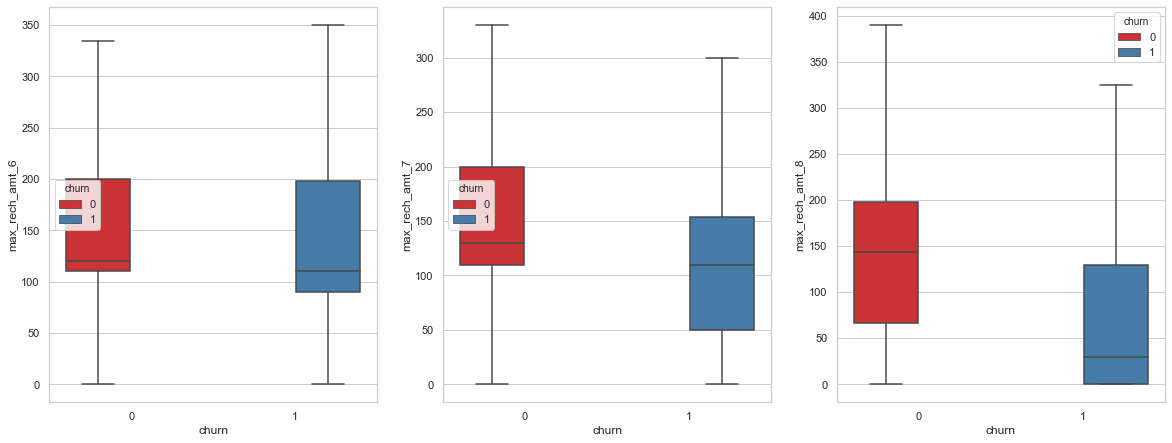

In [38]:
# Ploting for maximum recharge amount for data:
box_plot_eda('max_rech_amt')

In [39]:
# Check for null values in other recharge columns
100*churn_df_high_val_cust.loc[:,churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('rech_num|max_rech_data',regex=True)]].isnull().sum()/len(churn_df_high_val_cust)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.112443
max_rech_data_7     43.117551
max_rech_data_8     46.799987
dtype: float64

In [40]:
churn_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16740.000000,17038.000000,15935.000000
mean,139.804002,140.444712,136.353373
std,118.892926,120.295284,119.571138
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


### The minimum value is 1 while the max is 1555, which indicates that the missing values are where no recharges happened for the data, Hence impute the missing values by 0 so that it means no recharge.

In [41]:
churn_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= churn_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

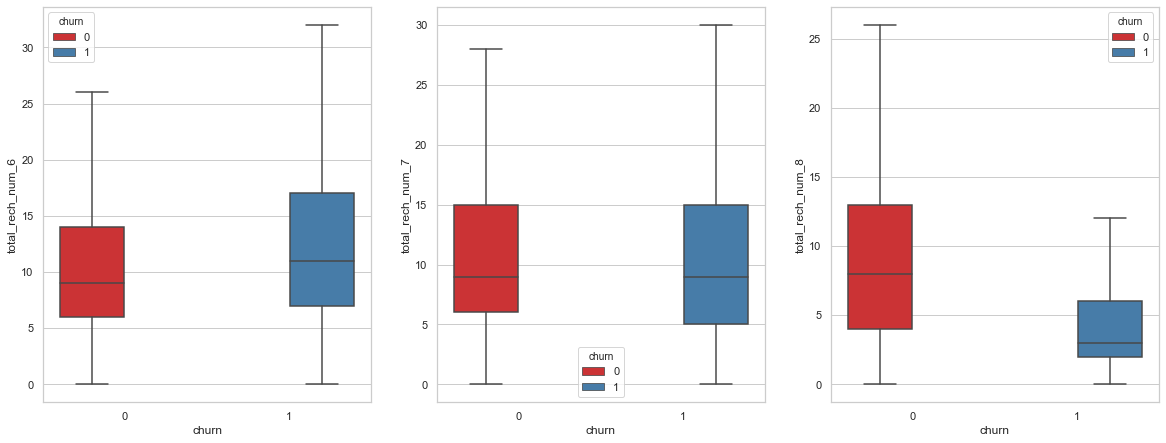

In [42]:
# Ploting for Total recharge for Number:
box_plot_eda('total_rech_num')

### From the plots above for recharge amount, recharge amount for data and recharge amount number we can conclude that there is a huge drop in total recharge number in the 8th month for churned customers.

In [43]:
# Analyse the data usage attributes
data_usage = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('2g|3g',regex=True)]

In [44]:
# check the % of null values for data usage columns
percentage_data_null = 100*churn_df_high_val_cust.loc[:,data_usage].isnull().sum()/len(churn_df_high_val_cust.loc[:,data_usage])
percentage_data_null = pd.DataFrame(percentage_data_null)
percentage_data_null.rename(columns={0:'Null_Per'}, inplace=True)
percentage_data_null

,Null_Per
count_rech_2g_6,44.112443
count_rech_2g_7,43.117551
count_rech_2g_8,46.799987
count_rech_3g_6,44.112443
count_rech_3g_7,43.117551
count_rech_3g_8,46.799987
vol_2g_mb_6,0.000000
vol_2g_mb_7,0.000000
vol_2g_mb_8,0.000000
vol_3g_mb_6,0.000000


In [45]:
# There are many data related columns for which 40% values are null. 
# Since we have data volume usage based data available, we can drop these columns.
churn_df_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8',],axis=1,inplace=True)

In [46]:
#check % null values after removal
round(100*(churn_df_high_val_cust.isnull().sum()/len(churn_df_high_val_cust.index)),2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.81
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.81
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.81
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.81
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6                 1.81
loc_og_mou_7  

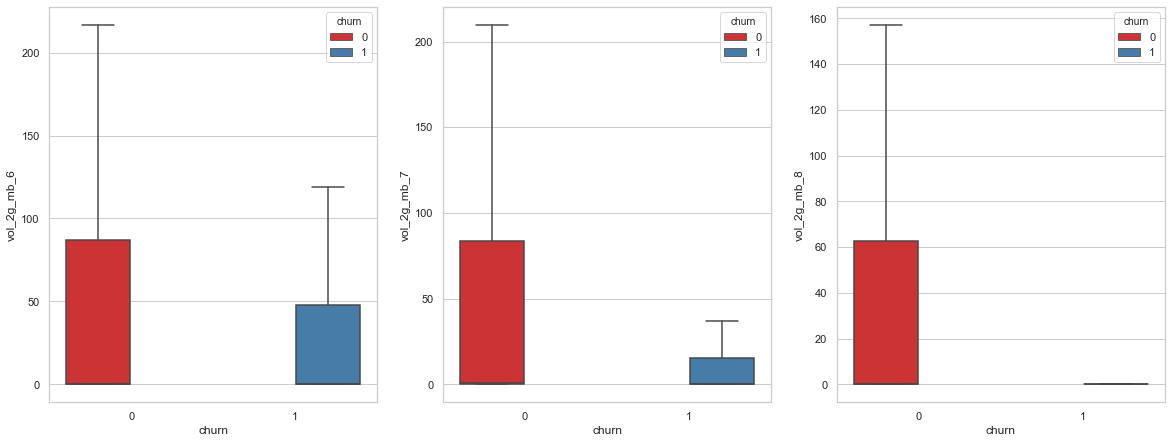

In [47]:
# Plot for data usage for 2g and 3g by volume
box_plot_eda('vol_2g_mb')

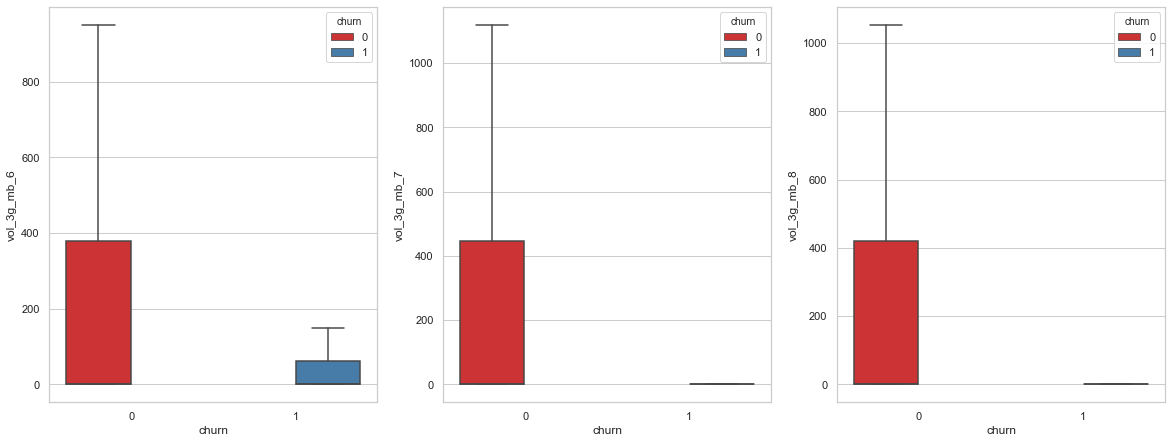

In [48]:
box_plot_eda('vol_3g_mb')

### We can see that for churned customers both 2g and 3g usage declines in the 8th month.

In [49]:
# bar_chart for checking monthly usage of data
monthly_2g_3g = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_2g_3g

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'], dtype='object')

In [50]:
churn_df_high_val_cust[monthly_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 6 columns):
monthly_2g_6    29953 non-null int64
monthly_2g_7    29953 non-null int64
monthly_2g_8    29953 non-null int64
monthly_3g_6    29953 non-null int64
monthly_3g_7    29953 non-null int64
monthly_3g_8    29953 non-null int64
dtypes: int64(6)
memory usage: 2.8 MB


In [51]:
churn_df_high_val_cust[monthly_2g_3g].describe()

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,0.174473,0.183187,0.153541,0.218075,0.229359,0.211264
std,0.435021,0.450466,0.406481,0.613612,0.659575,0.617885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000,14.000000,16.000000,16.000000


In [52]:
def mean_bar_eda(df,columns):
    df_0 = df[df.churn==0].filter(columns)
    df_1 = df[df.churn==1].filter(columns)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    meandf = [mean_df_0, mean_df_1]
    mean_barplot = pd.concat(meandf)

    mean_barplot.T.plot.bar(figsize=(8,6),rot=0)
    plt.show()
    
    return mean_barplot

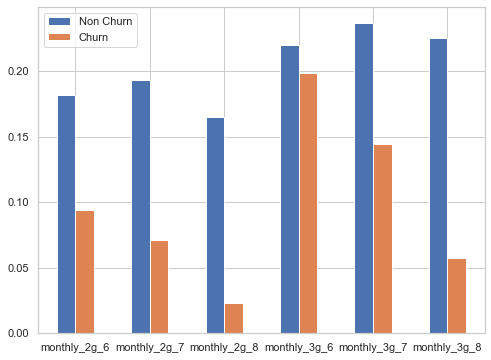

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181613,0.193096,0.165080,0.219840,0.236882,0.224891
Churn,0.093711,0.071106,0.023017,0.198109,0.144266,0.057131


In [53]:
mean_bar_eda(churn_df_high_val_cust, monthly_2g_3g)

### From above chart we can see the monthly subscription for 2g and 3g drops in the 8th month for churn customers

In [54]:
# check Volume based cost 
vbc_columns = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_columns.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [55]:
#remove the september month as that will be the 9th month data which is not needed for modelling, since jun, july and august are 6,7,8 months.
churn_df_high_val_cust.drop('sep_vbc_3g',axis=1,inplace=True)

In [56]:
# Renaming month named vbc columns to 6,7,8 format for easier usage and understanding
churn_df_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)

In [57]:
churn_df_high_val_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,

In [58]:
churn_df_high_val_cust.shape

(29953, 151)

In [59]:
# again create the vbc_columns list as we changed the column names
vbc_columns = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_columns.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

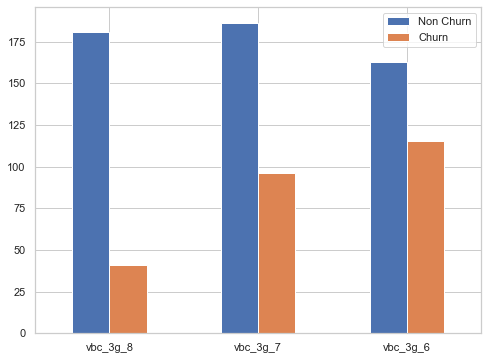

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.622636,186.370503,162.557305
Churn,40.940884,96.340707,115.461780


In [60]:
mean_bar_eda(churn_df_high_val_cust,vbc_columns)

### from the plot above we can see the volume based cost has decreased for the churned customers in the 8th month

In [61]:
# Check columns for average revenue per user
arpu_cols = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('arpu_')]

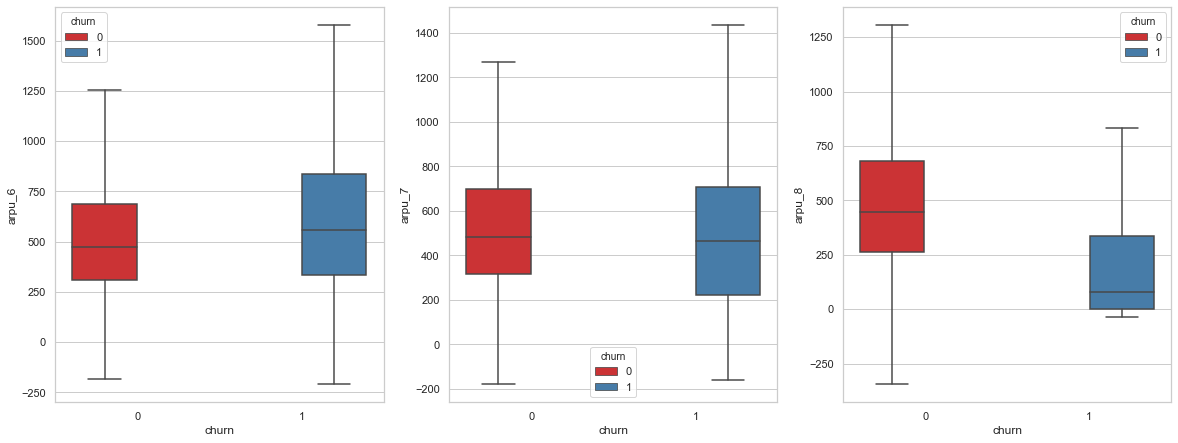

In [62]:
# Plotting arpu
box_plot_eda('arpu')

###### Average revenue for churned customers is lower in 8th month

### Minutes of Usage for voice calls

In [63]:
mou_columns = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('mou')]
mou_columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_

In [64]:
churn_df_high_val_cust[mou_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 81 columns):
onnet_mou_6         29411 non-null float64
onnet_mou_7         29417 non-null float64
onnet_mou_8         28781 non-null float64
offnet_mou_6        29411 non-null float64
offnet_mou_7        29417 non-null float64
offnet_mou_8        28781 non-null float64
roam_ic_mou_6       29411 non-null float64
roam_ic_mou_7       29417 non-null float64
roam_ic_mou_8       28781 non-null float64
roam_og_mou_6       29411 non-null float64
roam_og_mou_7       29417 non-null float64
roam_og_mou_8       28781 non-null float64
loc_og_t2t_mou_6    29411 non-null float64
loc_og_t2t_mou_7    29417 non-null float64
loc_og_t2t_mou_8    28781 non-null float64
loc_og_t2m_mou_6    29411 non-null float64
loc_og_t2m_mou_7    29417 non-null float64
loc_og_t2m_mou_8    28781 non-null float64
loc_og_t2f_mou_6    29411 non-null float64
loc_og_t2f_mou_7    29417 non-null float64
loc_og_t2f_mou_8    28781 non-n

In [65]:
# replacing null values by 0 for minutes of usage variables, since null values in minutes of usage denotes no usage so can be imputed with 0
churn_df_high_val_cust.loc[:,mou_columns] = churn_df_high_val_cust.loc[:,mou_columns].replace(np.NaN,0)

In [66]:
churn_df_high_val_cust[mou_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 81 columns):
onnet_mou_6         29953 non-null float64
onnet_mou_7         29953 non-null float64
onnet_mou_8         29953 non-null float64
offnet_mou_6        29953 non-null float64
offnet_mou_7        29953 non-null float64
offnet_mou_8        29953 non-null float64
roam_ic_mou_6       29953 non-null float64
roam_ic_mou_7       29953 non-null float64
roam_ic_mou_8       29953 non-null float64
roam_og_mou_6       29953 non-null float64
roam_og_mou_7       29953 non-null float64
roam_og_mou_8       29953 non-null float64
loc_og_t2t_mou_6    29953 non-null float64
loc_og_t2t_mou_7    29953 non-null float64
loc_og_t2t_mou_8    29953 non-null float64
loc_og_t2m_mou_6    29953 non-null float64
loc_og_t2m_mou_7    29953 non-null float64
loc_og_t2m_mou_8    29953 non-null float64
loc_og_t2f_mou_6    29953 non-null float64
loc_og_t2f_mou_7    29953 non-null float64
loc_og_t2f_mou_8    29953 non-n

In [67]:
churn_df_high_val_cust[mou_columns].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008,16.124001,12.646145,12.512269,26.596033,20.155134,19.889295,84.574122,85.762835,78.153334,163.309546,163.087606,151.810056,6.348347,6.426493,5.891865,1.577380,1.888737,1.701889,254.240239,255.285293,235.863120,165.897941,174.378166,148.587258,179.439168,187.961923,157.322964,1.806292,1.828363,1.586742,347.147123,364.172169,307.500304,2.174995,2.109014,1.952078,5.825077,7.106715,6.549024,610.058005,628.724108,551.929765,65.508916,66.686921,62.662397,150.474219,151.712177,146.303887,15.291721,16.046447,14.414880,231.284489,234.455252,223.390506,14.896832,15.432838,13.919836,29.212448,30.828347,27.920360,2.698829,2.801822,2.564944,46.811695,49.066658,44.408522,290.121569,296.944240,280.074127,0.061047,0.019767,0.026548,10.800999,11.893198,11.015061
std,459.853278,480.303238,458.751242,482.712621,499.138982,481.985106,76.344227,75.833558,74.179181,116.274169,96.134144,104.799622,228.962993,240.702116,227.540167,250.218928,241.683234,233.745412,22.139546,21.957189,19.516259,6.308138,9.143628,7.147606,378.546516,375.617344,363.548405,403.990737,421.470201,397.838396,409.143255,433.808121,409.035684,11.988810,12.990380,10.940142,608.845412,640.128871,609.109928,45.888834,45.581631,44.747769,17.579228,21.768942,20.289977,691.178402,717.567954,700.585424,163.855393,167.521866,159.026025,219.321437,218.367498,214.996335,45.785255,49.201697,43.335424,315.005426,316.177938,308.483647,77.750215,83.106360,71.387685,98.279300,105.685760,103.374423,19.114766,19.529757,19.912581,137.597749,148.231218,138.876998,365.739944,373.950048,361.356861,0.188124,0.181984,0.110617,76.789627,80.242156,70.655796
min,0.000000,0.000000,0.000000,0.00

In [68]:
# Since there lots of columns related to minutes of usage , we can check correlation via heatmap and remove the unwanted columns for each month from 6-8
mou_og_6_cols = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

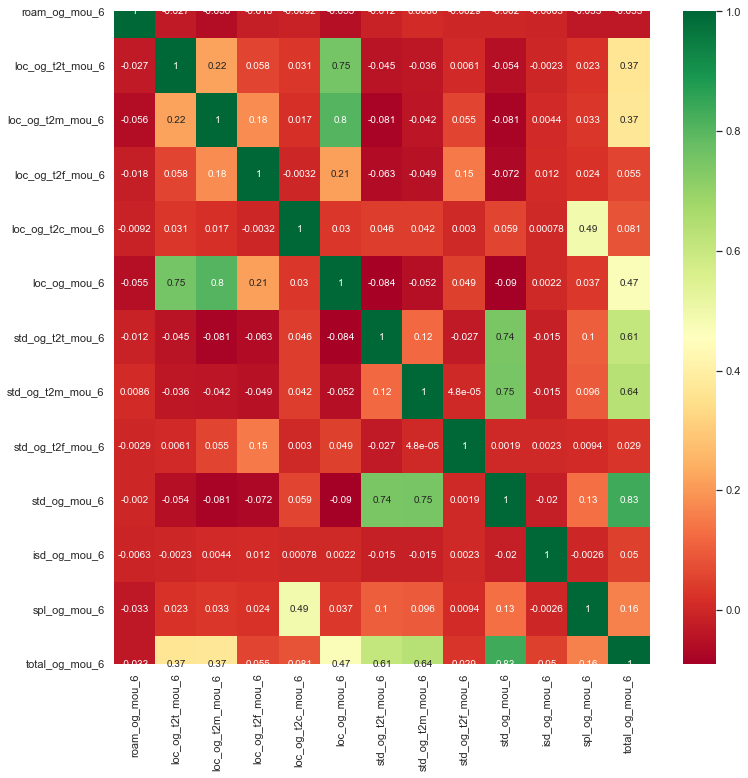

In [69]:
plt.figure(figsize=(12,12))
sns.heatmap(churn_df_high_val_cust.filter(mou_og_6_cols).corr(),cmap="RdYlGn",annot=True)
plt.show()

In [70]:
# total_og_mou_6, std_og_mou_6 and loc_og_mou_6 have strong correlation with other minutes of usage columns.
# They need to be checked for any multicolinearity.
print(churn_df_high_val_cust.loc[8,'total_og_mou_6'],"==",churn_df_high_val_cust.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(churn_df_high_val_cust.loc[8,'std_og_mou_6'],"==",churn_df_high_val_cust.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6']].sum())
print(churn_df_high_val_cust.loc[8,'loc_og_mou_6'],"==",churn_df_high_val_cust.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6']].sum())

508.36 == 508.34999999999997
130.26 == 130.25
378.09 == 378.09


In [71]:
# total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables for minutes of usage.So we can remove these columns for all months.
total_og_columns = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
churn_df_high_val_cust.drop(total_og_columns,axis=1,inplace=True)
total_og_columns.tolist()

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [72]:
# Checking for incoming calls minutes of usage
mou_ic_6_cols = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
mou_ic_6_cols.tolist()

['roam_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6']

In [73]:
churn_df_high_val_cust.loc[:,mou_ic_6_cols].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,16.124001,65.508916,150.474219,15.291721,231.284489,14.896832,29.212448,2.698829,46.811695,290.121569,0.061047,10.800999
std,76.344227,163.855393,219.321437,45.785255,315.005426,77.750215,98.279300,19.114766,137.597749,365.739944,0.188124,76.789627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.100000,28.090000,0.000000,47.910000,0.000000,0.000000,0.000000,1.030000,72.890000,0.000000,0.000000
50%,0.000000,25.080000,84.110000,1.840000,134.560000,0.380000,5.000000,0.000000,11.410000,183.780000,0.000000,0.000000
75%,0.000000,67.480000,188.740000,11.980000,297.260000,8.190000,23.630000,0.110000,41.490000,372.160000,0.000000,0.000000
max,2613.310000,6351.440000,4693.860000,1678.410000,7454.630000,5459.560000,4630.230000,1351.110000,5459.630000,7716.140000,19.760000,6789.410000


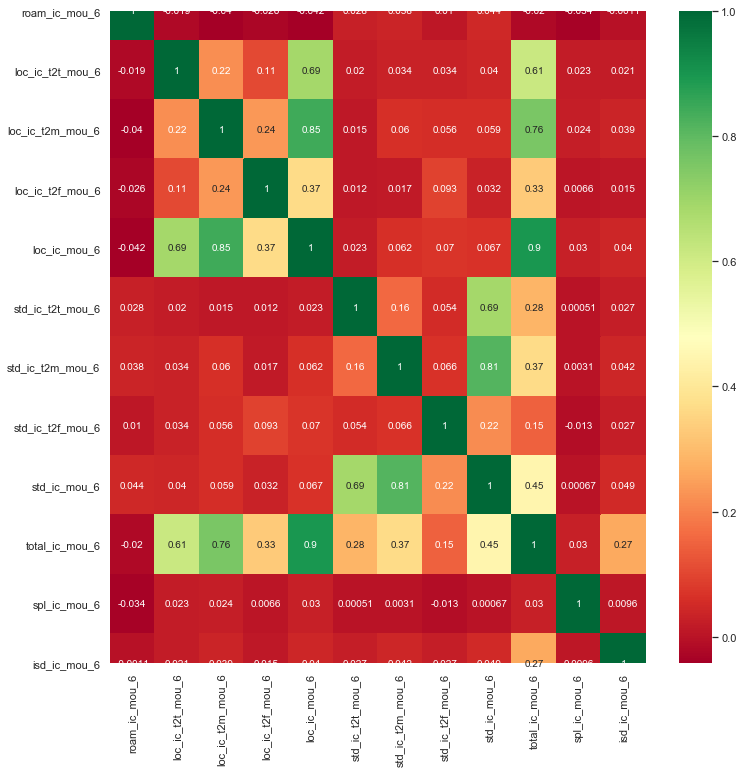

In [74]:
plt.figure(figsize=(12,12))
mou_ic_6_cols_corr = churn_df_high_val_cust.loc[:,mou_ic_6_cols].corr()
sns.heatmap(mou_ic_6_cols_corr,cmap = 'RdYlGn', annot=True)
plt.show()

##### total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 have strong correlation with other fields and they need to be checked to avoid any multicolinearity.

In [75]:
print(churn_df_high_val_cust.loc[21,'total_ic_mou_6'],"==",churn_df_high_val_cust.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(churn_df_high_val_cust.loc[21,'loc_ic_mou_6'],"==",churn_df_high_val_cust.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())
print(churn_df_high_val_cust.loc[21,'std_ic_mou_6'],"==",churn_df_high_val_cust.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

207.09 == 207.09
125.33 == 125.32000000000001
81.76 == 81.75


In [76]:
# Since the columns are multicolinear with other columns , drop them
total_ic_columns = churn_df_high_val_cust.columns[churn_df_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
churn_df_high_val_cust.drop(total_ic_columns,axis=1,inplace=True)
total_ic_columns

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'], dtype='object')

### Checking columns with more than 40% null values

In [77]:
round(100*(churn_df_high_val_cust.isnull().sum()/len(churn_df_high_val_cust.index)),2)


mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
loc_og_t2t_mou_6             0.00
loc_og_t2t_mou_7             0.00
loc_og_t2t_mou_8             0.00
loc_og_t2m_mou_6             0.00
loc_og_t2m_mou_7             0.00
loc_og_t2m_mou_8             0.00
loc_og_t2f_mou_6             0.00
loc_og_t2f_mou_7             0.00
loc_og_t2f_mou_8             0.00
loc_og_t2c_mou_6             0.00
loc_og_t2c_mou_7             0.00
loc_og_t2c_mou_8             0.00
std_og_t2t_mou_6             0.00
std_og_t2t_mou

In [78]:
churn_df_high_val_cust.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8'],axis=1,inplace=True)

In [79]:
churn_df_high_val_cust.shape

(29953, 124)

In [80]:
# Impute the other columns with 0 as these will not impact the analysis and very less number of values are missing.
numeric_col_others = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

In [81]:
for i in numeric_col_others:
    churn_df_high_val_cust.loc[churn_df_high_val_cust[i].isnull(),i]=0

In [82]:
# check null values again
round(100*(churn_df_high_val_cust.isnull().sum()/len(churn_df_high_val_cust.index)),2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
onnet_mou_6               0.00
onnet_mou_7               0.00
onnet_mou_8               0.00
offnet_mou_6              0.00
offnet_mou_7              0.00
offnet_mou_8              0.00
roam_ic_mou_6             0.00
roam_ic_mou_7             0.00
roam_ic_mou_8             0.00
roam_og_mou_6             0.00
roam_og_mou_7             0.00
roam_og_mou_8             0.00
loc_og_t2t_mou_6          0.00
loc_og_t2t_mou_7          0.00
loc_og_t2t_mou_8          0.00
loc_og_t2m_mou_6          0.00
loc_og_t2m_mou_7          0.00
loc_og_t2m_mou_8          0.00
loc_og_t2f_mou_6          0.00
loc_og_t2f_mou_7          0.00
loc_og_t2f_mou_8          0.00
loc_og_t2c_mou_6          0.00
loc_og_t2c_mou_7          0.00
loc_og_t2c_mou_8          0.00
std_og_t2t_mou_6          0.00
std_og_t2t_mou_7          0.00
std_og_t2t_mou_8          0.00
std_og_t2m_mou_6          0.00
std_og_t

In [83]:
churn_df_final = churn_df_high_val_cust.copy()
print(churn_df_final.shape)
churn_df_final.head()

(29953, 124)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,354.0,207.0,696.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.

In [84]:
# remove unwanted columns and the date fields with missing values
churn_df_final.drop(["total_avg_rech_amt_6_7"],axis=1,inplace=True)
churn_df_final.drop(churn_df_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (churn_df_final.shape)

(29953, 120)


In [85]:
# Merge the 6th and 7th month data
column_list = churn_df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(column_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    churn_df_final[avg_col_name] = (churn_df_final[col_6]  + churn_df_final[col_7])/ 2

columns_to_drop = churn_df_final.filter(regex='_6|_7')
churn_df_final.drop(columns_to_drop,axis=1,inplace=True)
print (churn_df_final.shape)

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data
(29953, 81)


In [86]:
churn_df_final.drop('mobile_number', axis=1, inplace=True)

In [87]:
churn_df_final.head(3)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.16,4.13,1.15,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,252,1.0,252.0,252.0,5.75,109.61,0,0,1,0,968,30.40,252.0,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.00,0.00,0.0,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600,252.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.0,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,13.795,40.825,13.37,0.09,2.25,0.0,45.20,219.525,126.81,24.36,109.215,43.215,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.0,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,0,3,0,0,315,21.03,207.0,0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,124.995,11.865,0.00,0.00,0.00,0.0,16.84,35.780,0.00,0.29,13.255,0.000,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405,177.0


### merged most of the columns related to month 6 & 7 to reduce the number of features.

# Modelling

First, looking at the distribution of the 'churn' column

In [88]:
churn_df_final.churn.value_counts(normalize = True).reset_index()

,index,churn
0,0,0.918773
1,1,0.081227


Text(0.5, 1.0, 'Class Distributions \n (0: No Churn || 1: Churn)')

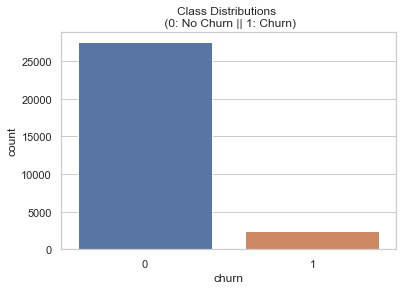

In [89]:
sns.countplot('churn', data=churn_df_final)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=12)

There is significant class imbalance. This would need to be handled

### Test - Train split

In [90]:
X = churn_df_final.drop('churn', axis=1)
y = churn_df_final['churn']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_test.columns = X_train.columns

In [92]:
y_train.value_counts(normalize = True).reset_index()

,index,churn
0,0,0.918777
1,1,0.081223


In [93]:
y_test.value_counts(normalize = True).reset_index()

,index,churn
0,0,0.918763
1,1,0.081237


Class imbalance has not been handled yet. As of now, the class imbalance is equal in both the train and the test sets to the original dataset. This is because we set the distribution in Stratify

## Applying Scaling

Looking at the range of values in all the columns within the train set

In [94]:
X_train.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
count,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000
mean,507.423910,235.180466,333.892055,12.327543,20.041546,77.580382,150.716100,5.908942,1.721532,149.893700,157.056402,1.547441,2.052605,6.543887,0.032719,63.065318,145.922529,14.126791,14.030793,28.144708,2.554422,0.026423,10.962065,1.227431,9.952449,581.800019,159.152668,91.316068,1.607192,72.808509,122.292939,106.199913,352.171576,0.152382,1.046788,0.215386,0.192636,1200.952163,170.946334,460.083803,558.247426,265.031237,372.350665,14.385242,23.450187,84.655933,161.810978,6.448330,1.770974,171.151245,181.365947,1.733759,2.246288,6.419026,0.344211,66.130043,150.227421,15.446622,15.340743,30.327019,2.677781,0.040849,11.553591,1.267941,11.739543,658.819502,170.362594,100.236085,1.752230,79.231912,135.816863,127.437481,358.831690,0.179592,1.132995,0.225783,0.213860,170.538648,490.574882
std,514.990008,460.453217,483.950362,70.480031,109.003737,220.238467,234.295844,19.499959,7.222860,402.682426,410.612605,10.326932,51.518485,20.766328,1.253140,163.223736,215.378281,39.655918,69.546025,101.979114,19.121915,0.112924,70.671013,11.229745,9.282208,627.985973,168.317398,138.433572,2.939977,111.623134,196.056477,314.997057,891.126374,0.404127,2.518093,0.627417,1.022287,955.981095,426.566111,1630.447396,448.350120,438.420541,451.871599,65.904884,96.081399,222.081239,230.770995,19.973398,6.890093,384.349237,386.610273,10.597543,51.361968,16.141456,2.506304,155.464382,206.593009,42.373397,79.271417,95.364811,15.460635,0.167206,78.288335,10.238667,8.495217,539.248230,153.917317,116.246528,2.653769,103.993136,1

There is significant variation in the values between different columns. So, we would need to apply scaling to bring all the values into the same range

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame((scaler.fit_transform(X_train)))
X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
count,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04,2.096700e+04
mean,1.113797e-16,-7.837538e-17,6.593720e-17,-6.759695e-16,-1.979665e-16,2.316241e-17,2.171255e-16,8.856791e-16,1.516834e-16,3.168666e-16,-3.302129e-16,-1.060748e-15,-1.251889e-15,-7.326826e-17,4.579369e-16,2.042584e-17,-5.147893e-17,-3.615148e-16,-2.989969e-16,-4.277485e-16,-3.192811e-16,5.925452e-16,-3.934172e-15,1.326264e-15,1.790864e-16,-5.705533e-17,1.632214e-16,3.827826e-16,2.186113e-15,9.278069e-17,8.739346e-16,-6.660491e-16,-2.814344e-17,4.437503e-16,9.995078e-16,8.686978e-16,8.464557e-16,-9.550237e-17,-3.240017e-16,-5.484291e-16,9.612984e-17,-8.926740e-17,3.935449e-17,-4.124272e-16,-9.039512e-16,4.134677e-17,1.520752e-17,-1.705869e-16,8.650335e-16,2.725572e-16,4.055250e-17,-6.083114e-16,-5.434484e-16,8.037958e-18,8.661561e-16,1.442702e-16,2.678790e-17,3.032926e-16,3.129601e-16,-1.191768e-16,3.988267e-16,4.680601e-16,9.885337e-16,7.930983e-16,7.657770e-17,2.781779e-17,2.550542e-16,-8.183043e-17,3.923773e-16,1.234075e-16,-5.866332e-16,-6.921222e-17,-4.733552e-16,5.827519e-16,-3.244941e-16,-4.501044e-16,-5.476798e-16,-8.715624e-16,5.494616e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.821932e+00,-5.107708e-01,-6.899468e-01,-1.749125e-01,-1.838655e-01,-3.522647e-01,-6.432880e-01,-3.030305e-01,-2.383506e-01,-3.722469e-01,-3.825020e-01,-1.498488e-01,-3.984306e-02,-3.151276e-01,-2.610988e-02,-3.863827e-01,-6.775335e-01,-3.562426e-01,-2.017531e-01,-2.759916e-01,-1.335893e-01,-2.339992e-01,-1.551177e-01,-1.093044e-01,-1.072233e+00,-9.264759e-01,-9.455735e-01,-6.596539e-01,-5.466814e-01,-6.522863e-01,-6.237787e-01,-3.371538e-01,-3.952077e-01,-3.770744e-01,-4.157164e-01,-3.432982e-01,-1.884409e-01,-1.067988e+00,-4.007595e-01,-2.821893e-01,-2.917500e+00,-6.045281e-01,-8.240384e-01,-2.182780e-01,-2.440717e-01,-3.81202

In [96]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.columns = X_train.columns
X_test_scaled.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
count,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000
mean,0.009492,-0.006046,0.008479,0.008737,-0.004656,0.008672,0.015564,-0.002919,-0.009065,-0.010815,0.002164,0.012686,-0.006504,0.000825,0.066435,-0.008229,0.005902,0.024216,-0.005318,-0.007333,0.001834,0.003665,0.002500,-0.000375,0.008312,0.015459,0.021224,0.027137,0.017934,-0.008018,-0.001422,-0.003451,-0.001278,0.009553,0.011869,-0.021898,0.032002,0.029040,-0.013047,0.007272,0.012958,-0.004219,0.027044,-0.000009,-0.002588,0.007693,0.020043,-0.010165,-0.018344,-0.008787,0.020129,0.026286,-0.006768,0.009679,0.010697,-0.000689,0.013969,0.017500,-0.007397,-0.010718,0.015641,-0.008824,-0.008792,0.019720,0.019492,0.013657,0.009794,0.012038,0.013229,-0.007090,-0.008547,-0.017515,-0.005029,-0.006515,0.011910,-0.011854,0.017714,-0.013839,0.005645
std,0.914199,0.987691,0.986452,1.165860,0.864841,1.106716,0.992141,1.002860,0.964882,0.959351,0.987218,1.186470,0.425976,0.921396,4.586012,0.911508,0.994143,1.283391,1.085835,1.044974,1.132054,0.930241,0.999359,1.411798,0.997872,0.909388,1.095474,1.155808,1.063834,0.969542,0.993077,0.979415,1.102746,1.019334,1.025246,0.948310,1.237221,1.004897,0.956860,0.986486,0.857193,1.010876,1.043458,1.010667,0.900752,1.005473,1.021966,1.158019,0.783894,1.012933,1.062980,1.271977,0.444637,1.225571,0.945844,1.038207,1.008454,1.150358,0.811977,0.951599,1.464935,0.612721,0.766842,1.915405,1.054081,0.844052,1.008056,0.992711,1.066638,0.975883,0.987966,0.906975,1.106891,0.983849,1.053863,0.944459,1.115604,0.974825,1.001197
min,-1.655514,-0.510771,-0.689947,-0.174912,-0.183865,-0.352265,-0.643288,-0.303031,-0.238351,-0.372247,-0.382502,-0.149849,-0.039843,-0

The values are now all in the same range

## Logistic Regression

Logistic Regression is a linear model that we could apply for this classification problem

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [98]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [99]:
y_train_pred = logreg.predict(X_train_scaled)

In [100]:
# Train Scores
print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n Classification report:\n', classification_report(y_train, y_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  0.9305098488100348
F1 score:  0.3890985324947589
Recall:  0.2724603640634175
Precision:  0.6803519061583577

 Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     19264
           1       0.68      0.27      0.39      1703

    accuracy                           0.93     20967
   macro avg       0.81      0.63      0.68     20967
weighted avg       0.92      0.93      0.92     20967


 Confusion matrix:
 [[19046   218]
 [ 1239   464]]


In [101]:
y_test_pred = logreg.predict(X_test_scaled)

In [102]:
# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

results = pd.DataFrame({'Model':['Logistic Regression - Basic'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
#results = results[['Method', 'RMSE', 'MAPE']]
results

Accuracy:  0.9292232361451146
Precision:  0.6556291390728477
Recall:  0.27123287671232876
F1 Score:  0.38372093023255816

 Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8256
           1       0.66      0.27      0.38       730

    accuracy                           0.93      8986
   macro avg       0.80      0.63      0.67      8986
weighted avg       0.92      0.93      0.92      8986


 Confusion matrix:
 [[8152  104]
 [ 532  198]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721


As we can see, the both the train accuracy and the test accuracy are quite high. But, Recall is quite low for both train and test. As Recall is a much better metric for us than accuracy, we would need to look at more optimisation. The high accuracy and low recall is a sign of class imbalance. We should handle this next

### Random Undersampling

Applying Undersampling on the scaled data

In [103]:
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 42)
X_scaled_resampled_us, y_scaled_resampled_us = under_sample.fit_resample(X_train_scaled, y_train)
len(X_scaled_resampled_us)

3406

Undersampling leaves us with 3406 datapoints

Using this class balanced data for logistic regression

In [104]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_scaled_resampled_us, y_scaled_resampled_us)

LogisticRegression(random_state=42)

In [105]:
y_train_pred = logreg.predict(X_scaled_resampled_us)

In [106]:
print ('Accuracy: ', accuracy_score(y_scaled_resampled_us, y_train_pred))
print ('F1 score: ', f1_score(y_scaled_resampled_us, y_train_pred))
print ('Recall: ', recall_score(y_scaled_resampled_us, y_train_pred))
print ('Precision: ', precision_score(y_scaled_resampled_us, y_train_pred))
print ('\n clasification report:\n', classification_report(y_scaled_resampled_us, y_train_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_scaled_resampled_us, y_train_pred))

Accuracy:  0.8229594832648268
F1 score:  0.8263748920241866
Recall:  0.8426306517909571
Precision:  0.8107344632768362

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1703
           1       0.81      0.84      0.83      1703

    accuracy                           0.82      3406
   macro avg       0.82      0.82      0.82      3406
weighted avg       0.82      0.82      0.82      3406


 confussion matrix:
 [[1368  335]
 [ 268 1435]]


In [107]:
y_test_pred = logreg.predict(X_test_scaled)

In [108]:
# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Logistic Regression - Random Undersampling'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.8091475628755842
Precision:  0.27439303710490154
Recall:  0.8205479452054795
F1 Score:  0.4112598695502918

 Classification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8256
           1       0.27      0.82      0.41       730

    accuracy                           0.81      8986
   macro avg       0.63      0.81      0.65      8986
weighted avg       0.92      0.81      0.85      8986


 Confusion matrix:
 [[6672 1584]
 [ 131  599]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260


Logistic Regression with random undersapling gives us a decent Recall of 82%

### ADASYN

Applying ADASYN (Over Sampling) on the scaled data

In [109]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42, n_neighbors=5)
X_scaled_resampled_ada, y_scaled_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_scaled_resampled_ada)

38025

In [110]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_scaled_resampled_ada, y_scaled_resampled_ada)

LogisticRegression(random_state=42)

In [111]:
y_train_pred = logreg.predict(X_scaled_resampled_ada)

In [112]:
print ('Accuracy: ', accuracy_score(y_scaled_resampled_ada, y_train_pred))
print ('F1 score: ', f1_score(y_scaled_resampled_ada, y_train_pred))
print ('Recall: ', recall_score(y_scaled_resampled_ada, y_train_pred))
print ('Precision: ', precision_score(y_scaled_resampled_ada, y_train_pred))
print ('\n clasification report:\n', classification_report(y_scaled_resampled_ada, y_train_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_scaled_resampled_ada, y_train_pred))

Accuracy:  0.8085996055226824
F1 score:  0.8086951950373252
Recall:  0.8199456318959544
Precision:  0.7977493128662553

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81     19264
           1       0.80      0.82      0.81     18761

    accuracy                           0.81     38025
   macro avg       0.81      0.81      0.81     38025
weighted avg       0.81      0.81      0.81     38025


 confussion matrix:
 [[15364  3900]
 [ 3378 15383]]


In [113]:
y_test_pred = logreg.predict(X_test_scaled)

In [114]:
# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Logistic Regression - ADASYN (All Features)'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.46483418651235253
Precision:  0.12625984973428625
Recall:  0.9438356164383561
F1 Score:  0.22272506869241962

 Classification report:
               precision    recall  f1-score   support

           0       0.99      0.42      0.59      8256
           1       0.13      0.94      0.22       730

    accuracy                           0.46      8986
   macro avg       0.56      0.68      0.41      8986
weighted avg       0.92      0.46      0.56      8986


 Confusion matrix:
 [[3488 4768]
 [  41  689]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725


Logistic Regression with ADASYN oversampling gives us a good Recall of 94%. Accuracy takes a significant hit in comparison to undersampling, but Recall is our primary criteria, so we can continue with ADASYN oversampling for the final logistic regression model creation

### Feature Elimination

Using RFECV to identify the optimal number of features for model creation

In [115]:
from sklearn.feature_selection import RFECV

In [116]:
rfecv = RFECV(estimator=logreg, cv=4, scoring='recall')

In [117]:
%%time
rfecv.fit(X_scaled_resampled_ada, y_scaled_resampled_ada)

Wall time: 3min 10s


RFECV(cv=4, estimator=LogisticRegression(random_state=42), scoring='recall')

In [118]:
rfecv.grid_scores_

array([0.99466993, 0.95586574, 0.95000209, 0.91546576, 0.88252264,
       0.84963357, 0.83572099, 0.81210885, 0.82117066, 0.80949753,
       0.80987065, 0.81695972, 0.81722638, 0.82159714, 0.81653259,
       0.81178808, 0.81418698, 0.80773804, 0.81018988, 0.80773779,
       0.80816462, 0.80608578, 0.80320729, 0.80048894, 0.79457247,
       0.79579804, 0.78700309, 0.78620371, 0.78758978, 0.79137445,
       0.79595803, 0.79286634, 0.79755726, 0.79723744, 0.79451901,
       0.79494531, 0.79878323, 0.80064878, 0.79936957, 0.79862328,
       0.80304748, 0.80326077, 0.80603231, 0.80576565, 0.80608561,
       0.80539262, 0.8077915 , 0.80864445, 0.80885774, 0.81184286,
       0.81232235, 0.81370841, 0.81365495, 0.81099001, 0.81461471,
       0.8130152 , 0.81269532, 0.81312174, 0.81599998, 0.81168264,
       0.8123755 , 0.81397462, 0.81365473, 0.81504062, 0.81381458,
       0.81237532, 0.81338803, 0.81264169, 0.81306818, 0.81221537,
       0.81120268, 0.81221549, 0.81269531, 0.81157578, 0.81152

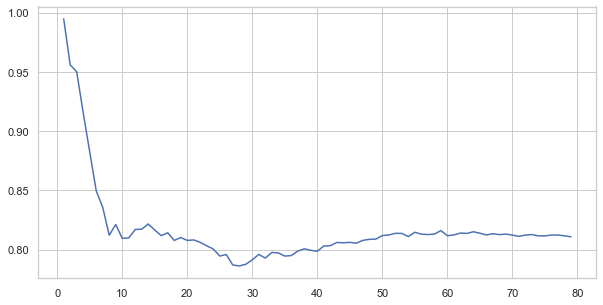

In [119]:
num_features = X_scaled_resampled_ada.shape
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [120]:
rfecv.n_features_

1

In [121]:
X_scaled_resampled_ada.columns[rfecv.get_support(0)]

Index(['monthly_2g_8'], dtype='object')

The maximum calue for recall corresponds to using just one feature for the model ('monthly_2g_8'). We receive a very high value of Recall of ~99% for such a model. 
Lets try building teh model with just this feature

In [122]:
logreg.fit(X_scaled_resampled_ada[['monthly_2g_8']], y_scaled_resampled_ada)

LogisticRegression(random_state=42)

In [123]:
y_train_pred = logreg.predict(X_scaled_resampled_ada[['monthly_2g_8']])

In [124]:
print ('Accuracy: ', accuracy_score(y_scaled_resampled_ada, y_train_pred))
print ('F1 score: ', f1_score(y_scaled_resampled_ada, y_train_pred))
print ('Recall: ', recall_score(y_scaled_resampled_ada, y_train_pred))
print ('Precision: ', precision_score(y_scaled_resampled_ada, y_train_pred))
print ('\n Classification report:\n', classification_report(y_scaled_resampled_ada, y_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_scaled_resampled_ada, y_train_pred))

Accuracy:  0.5655489809335963
F1 score:  0.6931763307455148
Recall:  0.994669793721017
Precision:  0.5319403665802002

 Classification report:
               precision    recall  f1-score   support

           0       0.97      0.15      0.26     19264
           1       0.53      0.99      0.69     18761

    accuracy                           0.57     38025
   macro avg       0.75      0.57      0.47     38025
weighted avg       0.75      0.57      0.47     38025


 Confusion matrix:
 [[ 2844 16420]
 [  100 18661]]


In [125]:
y_test_pred = logreg.predict(X_test_scaled[['monthly_2g_8']])

In [126]:
# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Logistic Regression - ADASYN - 1 Feature'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.21711551302025373
Precision:  0.09201501229455157
Recall:  0.9739726027397261
F1 Score:  0.16814473217452997

 Classification report:
               precision    recall  f1-score   support

           0       0.98      0.15      0.26      8256
           1       0.09      0.97      0.17       730

    accuracy                           0.22      8986
   macro avg       0.54      0.56      0.21      8986
weighted avg       0.91      0.22      0.25      8986


 Confusion matrix:
 [[1240 7016]
 [  19  711]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145


We get a very good Test Recall of 97% for this model. The accuracy is pretty low at 21%, but the high value of recall makes up for this. This is one of the best model to use if we want to be able to identify most of the people who would be leaving the network

We can certainly look at other models with more features if we would like to also balance the accuracy, but this model only looks at maximising the recall

### A more balanced Logistic Regression model

In [127]:
from sklearn.feature_selection import RFE

Selecting 14 features

In [128]:
rfe=RFE(estimator=logreg, n_features_to_select=14)
rfe.fit(X_scaled_resampled_ada, y_scaled_resampled_ada)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=14)

In [129]:
col=X_test_scaled.columns[rfe.support_]

Creating a model with the selected 14 columns

In [130]:
X_train_sm = sm.add_constant(X_scaled_resampled_ada[col])
logm = sm.GLM(y_scaled_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38025
Model:                            GLM   Df Residuals:                    38010
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19235.
Date:                Mon, 31 Aug 2020   Deviance:                       38471.
Time:                        22:59:17   Pearson chi2:                 4.97e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5394      0.026     20.929      0.000       0.489       0.590
loc_og_t2f_mou_8           -0.0311      0.002    -15.309      0.000      -0.035      -0.027
loc_og_t2c_mou_8            0.0363      0.003     10.609      0.000       0.030       0.043
spl_og_mou_8               -0.0301      0.002    -14.356      0.000      -0.034      -0.026
loc_ic_t2f_mou_8           -0.0281      0.001    -23.579      0.000      -0.030      -0.026
total_rech_num_8           -0.1376      0.003    -46.376      0.000      -0.143      -0.132
total_rech_data_8          -0.0974      0.018     -5.301      0.000      -0.133      -0.061
monthly_2g_8               -2.9184      0.108    -26.954      0.000      -3.131      -2.706
sachet_2g_8                -0.2862      0.024    -11.927      0.000      -0.333      -0.239
avg_spl_og_mou_av67         0.0103      0.001      8.845      0.000       0.008       0.013
avg_og_others_av67         -0.1006      0.016     -6.221      0.000      -0.132      -0.069
avg_total_rech_num_av67     0.0955      0.003     34.748      0.000       0.090       0.101
avg_monthly_2g_av67        -0.2872      0.051     -5.603      0.000      -0.388      -0.187
avg_sachet_2g_av67          0.0518      0.009      5.760      0.000       0.034       0.069
avg_sachet_3g_av67          0.0888      0.020      4.549      0.000       0.051       0.127
===========================================================================================
"""

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_scaled_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_scaled_resampled_ada[col].values, i) for i in range(X_scaled_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_data_8,9.29
7,sachet_2g_8,8.69
10,avg_total_rech_num_av67,3.98
4,total_rech_num_8,3.84
12,avg_sachet_2g_av67,2.15
2,spl_og_mou_8,1.89
8,avg_spl_og_mou_av67,1.71
6,monthly_2g_8,1.68
11,avg_monthly_2g_av67,1.64
13,avg_sachet_3g_av67,1.50


'total_rech_data_8' has a very high VIF. Drop this column

In [133]:
col = col.drop('total_rech_data_8')

In [134]:
X_train_sm = sm.add_constant(X_scaled_resampled_ada[col])
logm = sm.GLM(y_scaled_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38025
Model:                            GLM   Df Residuals:                    38011
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19250.
Date:                Mon, 31 Aug 2020   Deviance:                       38500.
Time:                        22:59:19   Pearson chi2:                 7.12e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5088      0.025     20.274      0.000       0.460       0.558
loc_og_t2f_mou_8           -0.0313      0.002    -15.379      0.000      -0.035      -0.027
loc_og_t2c_mou_8            0.0359      0.003     10.556      0.000       0.029       0.043
spl_og_mou_8               -0.0300      0.002    -14.305      0.000      -0.034      -0.026
loc_ic_t2f_mou_8           -0.0284      0.001    -23.780      0.000      -0.031      -0.026
total_rech_num_8           -0.1402      0.003    -47.709      0.000      -0.146      -0.134
monthly_2g_8               -2.9898      0.107    -27.839      0.000      -3.200      -2.779
sachet_2g_8                -0.3857      0.015    -25.605      0.000      -0.415      -0.356
avg_spl_og_mou_av67         0.0104      0.001      8.860      0.000       0.008       0.013
avg_og_others_av67         -0.1002      0.016     -6.185      0.000      -0.132      -0.068
avg_total_rech_num_av67     0.0981      0.003     36.084      0.000       0.093       0.103
avg_monthly_2g_av67        -0.2947      0.051     -5.765      0.000      -0.395      -0.195
avg_sachet_2g_av67          0.0530      0.009      5.897      0.000       0.035       0.071
avg_sachet_3g_av67          0.0326      0.016      2.048      0.041       0.001       0.064
===========================================================================================
"""

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_scaled_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_scaled_resampled_ada[col].values, i) for i in range(X_scaled_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,avg_total_rech_num_av67,3.96
4,total_rech_num_8,3.74
11,avg_sachet_2g_av67,2.14
6,sachet_2g_8,2.07
2,spl_og_mou_8,1.89
7,avg_spl_og_mou_av67,1.71
10,avg_monthly_2g_av67,1.63
5,monthly_2g_8,1.59
1,loc_og_t2c_mou_8,1.45
3,loc_ic_t2f_mou_8,1.28


'avg_total_rech_num_av67' has a very high VIF. Drop this column

In [136]:
col = col.drop('avg_total_rech_num_av67')

Create model again

In [137]:
X_train_sm = sm.add_constant(X_scaled_resampled_ada[col])
logm = sm.GLM(y_scaled_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38025
Model:                            GLM   Df Residuals:                    38012
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20041.
Date:                Mon, 31 Aug 2020   Deviance:                       40083.
Time:                        22:59:20   Pearson chi2:                 3.06e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0671      0.021     51.082      0.000       1.026       1.108
loc_og_t2f_mou_8       -0.0388      0.002    -18.235      0.000      -0.043      -0.035
loc_og_t2c_mou_8        0.0312      0.003      9.540      0.000       0.025       0.038
spl_og_mou_8           -0.0338      0.002    -16.414      0.000      -0.038      -0.030
loc_ic_t2f_mou_8       -0.0304      0.001    -25.204      0.000      -0.033      -0.028
total_rech_num_8       -0.0674      0.002    -34.378      0.000      -0.071      -0.064
monthly_2g_8           -3.0956      0.107    -28.936      0.000      -3.305      -2.886
sachet_2g_8            -0.4901      0.015    -33.054      0.000      -0.519      -0.461
avg_spl_og_mou_av67     0.0173      0.001     14.750      0.000       0.015       0.020
avg_og_others_av67     -0.0013      0.006     -0.233      0.816      -0.013       0.010
avg_monthly_2g_av67    -0.4656      0.051     -9.208      0.000      -0.565      -0.367
avg_sachet_2g_av67      0.1281      0.009     14.910      0.000       0.111       0.145
avg_sachet_3g_av67      0.0644      0.015      4.351      0.000       0.035       0.093
=======================================================================================
"""

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_scaled_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_scaled_resampled_ada[col].values, i) for i in range(X_scaled_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,sachet_2g_8,1.92
10,avg_sachet_2g_av67,1.88
2,spl_og_mou_8,1.86
9,avg_monthly_2g_av67,1.62
7,avg_spl_og_mou_av67,1.60
5,monthly_2g_8,1.59
4,total_rech_num_8,1.57
1,loc_og_t2c_mou_8,1.45
3,loc_ic_t2f_mou_8,1.28
0,loc_og_t2f_mou_8,1.25


'avg_og_others_av67' has high p value. Drop this column

In [139]:
col = col.drop('avg_og_others_av67')

Recreate the model

In [140]:
X_train_sm = sm.add_constant(X_scaled_resampled_ada[col])
logm = sm.GLM(y_scaled_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38025
Model:                            GLM   Df Residuals:                    38013
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20041.
Date:                Mon, 31 Aug 2020   Deviance:                       40083.
Time:                        22:59:21   Pearson chi2:                 3.06e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0669      0.021     51.119      0.000       1.026       1.108
loc_og_t2f_mou_8       -0.0388      0.002    -18.234      0.000      -0.043      -0.035
loc_og_t2c_mou_8        0.0313      0.003      9.564      0.000       0.025       0.038
spl_og_mou_8           -0.0338      0.002    -16.431      0.000      -0.038      -0.030
loc_ic_t2f_mou_8       -0.0304      0.001    -25.204      0.000      -0.033      -0.028
total_rech_num_8       -0.0674      0.002    -34.386      0.000      -0.071      -0.064
monthly_2g_8           -3.0955      0.107    -28.935      0.000      -3.305      -2.886
sachet_2g_8            -0.4901      0.015    -33.055      0.000      -0.519      -0.461
avg_spl_og_mou_av67     0.0173      0.001     14.832      0.000       0.015       0.020
avg_monthly_2g_av67    -0.4654      0.051     -9.206      0.000      -0.565      -0.366
avg_sachet_2g_av67      0.1281      0.009     14.909      0.000       0.111       0.145
avg_sachet_3g_av67      0.0644      0.015      4.352      0.000       0.035       0.093
=======================================================================================
"""

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_scaled_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_scaled_resampled_ada[col].values, i) for i in range(X_scaled_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,sachet_2g_8,1.92
9,avg_sachet_2g_av67,1.88
2,spl_og_mou_8,1.86
8,avg_monthly_2g_av67,1.62
5,monthly_2g_8,1.59
7,avg_spl_og_mou_av67,1.57
4,total_rech_num_8,1.56
1,loc_og_t2c_mou_8,1.45
3,loc_ic_t2f_mou_8,1.28
0,loc_og_t2f_mou_8,1.25


Now all features have low VIF and very low p values. So, this is a good model

In [142]:
y_test_pred = res.predict(sm.add_constant(X_test[col])).values.reshape(-1)

In [143]:
y_test_pred_final = pd.DataFrame(y_test)
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,churn,Churn_Prob,predicted
6615,0,0.507184,1
39106,0,0.524762,1
9684,0,0.028724,0
39303,1,0.724436,1
66474,0,0.748228,1


In [144]:
# Test Scores
accuracy = accuracy_score(y_test, y_test_pred_final['predicted'])
f1 = f1_score(y_test, y_test_pred_final['predicted'])
recall = recall_score(y_test, y_test_pred_final['predicted'])
precision = precision_score(y_test, y_test_pred_final['predicted'])

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred_final['predicted']))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred_final['predicted']))

temp_results = pd.DataFrame({'Model':['Logistic Regression - ADASYN - Balanced (Final)'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.6584687291342087
Precision:  0.1704705550859397
Recall:  0.8287671232876712
F1 Score:  0.2827763496143959

 Classification report:
               precision    recall  f1-score   support

           0       0.98      0.64      0.78      8256
           1       0.17      0.83      0.28       730

    accuracy                           0.66      8986
   macro avg       0.57      0.74      0.53      8986
weighted avg       0.91      0.66      0.74      8986


 Confusion matrix:
 [[5312 2944]
 [ 125  605]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776


The model gives a good Recall value (82%) and a reasonable accuracy(65%). So, this is a good balalnced model

## Decision Trees

Using unscaled data for creating decision tree models. This is because decsion trees can handle unscaled data, and unscaled data is more interpretable

First, creating a decision tree without setting any hyperparameters. This is to set a base line for the accuracy and recall

In [145]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [146]:
y_train_pred = dtc.predict(X_train)

print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n Classification report:\n', classification_report(y_train,y_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967


 Confusion matrix:
 [[19264     0]
 [    0  1703]]


In [147]:
y_test_pred = dtc.predict(X_test)

# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Decision Tree - Basic'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.911306476741598
Precision:  0.45807259073842305
Recall:  0.5013698630136987
F1 Score:  0.4787442773054284

 Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      8256
           1       0.46      0.50      0.48       730

    accuracy                           0.91      8986
   macro avg       0.71      0.72      0.72      8986
weighted avg       0.92      0.91      0.91      8986


 Confusion matrix:
 [[7823  433]
 [ 364  366]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776
0,Decision Tree - Basic,0.911306,0.501370,0.458073,0.478744


The most basic decision tree without any hyperparameters has a low test recall of 50%. Also, the accuracy for this is good enough (90%). This is an indication of class imbalance. We should try some class balancing techniques for better results

### Random Undersampling

In [148]:
# Random Undersampling
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

3406

In [149]:
# Decision Trees - Random UnderSampling

dtc_us = DecisionTreeClassifier(random_state=42)
dtc_us.fit(X_resampled_us, y_resampled_us)

DecisionTreeClassifier(random_state=42)

In [150]:
y_train_pred = dtc_us.predict(X_train)

print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n Classification report:\n', classification_report(y_train,y_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  0.8118948824343015
F1 score:  0.4634013605442177
Recall:  1.0
Precision:  0.3015760580839384

 Classification report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     19264
           1       0.30      1.00      0.46      1703

    accuracy                           0.81     20967
   macro avg       0.65      0.90      0.67     20967
weighted avg       0.94      0.81      0.85     20967


 Confusion matrix:
 [[15320  3944]
 [    0  1703]]


In [151]:
y_test_pred = dtc_us.predict(X_test)

# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Decision Tree - Random Undersampling'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.7779879813042511
Precision:  0.23634847853272198
Recall:  0.7767123287671233
F1 Score:  0.36241610738255037

 Classification report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      8256
           1       0.24      0.78      0.36       730

    accuracy                           0.78      8986
   macro avg       0.61      0.78      0.61      8986
weighted avg       0.92      0.78      0.82      8986


 Confusion matrix:
 [[6424 1832]
 [ 163  567]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776
0,Decision Tree - Basic,0.911306,0.501370,0.458073,0.478744
0,Decision Tree - Random Undersampling,0.777988,0.776712,0.236348,0.362416


While the train recall is at 100%, the test accuracy and recall are respectable and balanced at ~79%. This is a good starting point for further optimisation

### ADASYN

In [152]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

38025

In [153]:
# Decision Trees - ADASYN
dtc_ada = DecisionTreeClassifier(random_state=42)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [154]:
y_train_pred = dtc_ada.predict(X_train)

print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n Classification report:\n', classification_report(y_train,y_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967


 Confusion matrix:
 [[19264     0]
 [    0  1703]]


In [155]:
y_test_pred = dtc_ada.predict(X_test)

# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Decision Tree - ADASYN'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.8793679056309816
Precision:  0.35225375626043404
Recall:  0.5780821917808219
F1 Score:  0.4377593360995851

 Classification report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      8256
           1       0.35      0.58      0.44       730

    accuracy                           0.88      8986
   macro avg       0.66      0.74      0.69      8986
weighted avg       0.91      0.88      0.89      8986


 Confusion matrix:
 [[7480  776]
 [ 308  422]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776
0,Decision Tree - Basic,0.911306,0.501370,0.458073,0.478744
0,Decision Tree - Random Undersampling,0.777988,0.776712,0.236348,0.362416
0,Decision Tree - ADASYN,0.879368,0.578082,0.352254,0.437759


The training accuracy and recall are both at 100%, while these measures for the test set are much lower. This could be because there might be some overfitting as no hyperparameters have been tuned yet. But, the much higher training scores point towards promising results from this dataset. So, continuing with ADASYN balanced data 

### Hyperparameter tuning

In [156]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
dt = DecisionTreeClassifier(random_state=42)

In [158]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50)}

In [159]:
model_rcv = RandomizedSearchCV(estimator=dt, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              scoring = 'recall',
                              n_jobs=-1,
                              n_iter=100,
                              random_state=42)

In [160]:
%%time
#1model_rcv.fit(X_resampled_us, y_resampled_us)
model_rcv.fit(X_resampled_ada, y_resampled_ada)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   47.8s


Wall time: 53.8 s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   53.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50)},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=1)

In [161]:
model_rcv.best_score_

0.8846009759356693

The recall for the training data is very promising at 88%

In [162]:
model_rcv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=6, min_samples_leaf=270,
                       random_state=42)

In [163]:
y_test_pred=model_rcv.best_estimator_.predict(X_test)

# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Decision Tree - ADASYN - Tuned (Final)'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.7449365679946583
Precision:  0.22186609686609687
Recall:  0.8534246575342466
F1 Score:  0.35217637083097797

 Classification report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      8256
           1       0.22      0.85      0.35       730

    accuracy                           0.74      8986
   macro avg       0.60      0.79      0.60      8986
weighted avg       0.92      0.74      0.80      8986


 Confusion matrix:
 [[6071 2185]
 [ 107  623]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776
0,Decision Tree - Basic,0.911306,0.501370,0.458073,0.478744
0,Decision Tree - Random Undersampling,0.777988,0.776712,0.236348,0.362416
0,Decision Tree - ADASYN,0.879368,0.578082,0.352254,0.437759
0,Decision Tree - ADASYN - Tuned (Final),0.744937,0.853425,0.221866,0.352176


Having a max depth of 3 leads to a very simple Decision tree that would also be easy to interpret. This seems like a good model. But, it would still be a good idea to explore other models with similar accuracy

Also, the accuracy and precision are high enough at 75% and 85% respectively.

Lets explore other models with similar Recall values

In [164]:
cv_df = pd.DataFrame(model_rcv.cv_results_)

In [165]:
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf', 'rank_test_score',  'mean_test_score']
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

,param_max_depth,param_max_features,param_min_samples_leaf,rank_test_score,mean_test_score
78,3,6,270,1,0.884601
48,3,15,170,2,0.864665
42,7,15,20,3,0.861255
32,9,15,170,4,0.854005
54,7,16,20,5,0.849635
38,7,13,120,6,0.846543
71,16,6,20,7,0.845957
95,9,7,120,8,0.845638
96,7,13,70,9,0.844892
0,13,16,70,10,0.844146


The model we have been looking at seems simple enough with a max depth of 3. Other models with similar Recall values are much more complex in comparison. So, it wouold be a good idea to stick with this model.

## Random Forests

Using unscaled data for creating random forest models. This is because random forests can handle unscaled data, and unscaled data is more interpretable

First, creating a random forest without setting any hyperparameters. This is to set a base line for the accuracy and recall

In [166]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [167]:
y_train_pred = rfc.predict(X_train)

print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n Classification report:\n', classification_report(y_train,y_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967


 Confusion matrix:
 [[19264     0]
 [    0  1703]]


In [168]:
y_test_pred = rfc.predict(X_test)

# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Random Forest - Basic'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.9420209214333407
Precision:  0.7266811279826464
Recall:  0.4589041095890411
F1 Score:  0.5625524769101595

 Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8256
           1       0.73      0.46      0.56       730

    accuracy                           0.94      8986
   macro avg       0.84      0.72      0.77      8986
weighted avg       0.94      0.94      0.94      8986


 Confusion matrix:
 [[8130  126]
 [ 395  335]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776
0,Decision Tree - Basic,0.911306,0.501370,0.458073,0.478744
0,Decision Tree - Random Undersampling,0.777988,0.776712,0.236348,0.362416
0,Decision Tree - ADASYN,0.879368,0.578082,0.352254,0.437759
0,Decision Tree - ADASYN - Tuned (Final),0.744937,0.853425,0.221866,0.352176
0,Random Forest - Basic,0.942021,0.458904,0.726681,0.562552


The most basic random forest without any hyperparameters has a low test recall of 46%. Also, the accuracy for this is good enough (94%). This is an indication of class imbalance. We should try some class balancing techniques for better results

### Random Undersampling

In [169]:
rfc_us = RandomForestClassifier(random_state=42)
rfc_us.fit(X_resampled_us, y_resampled_us)

RandomForestClassifier(random_state=42)

In [170]:
y_train_pred = rfc_us.predict(X_train)

print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n Classification report:\n', classification_report(y_train,y_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  0.9089044689273621
F1 score:  0.6407072987208428
Recall:  1.0
Precision:  0.47135344588984224

 Classification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     19264
           1       0.47      1.00      0.64      1703

    accuracy                           0.91     20967
   macro avg       0.74      0.95      0.79     20967
weighted avg       0.96      0.91      0.92     20967


 Confusion matrix:
 [[17354  1910]
 [    0  1703]]


In [171]:
y_test_pred = rfc_us.predict(X_test)

# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Random Forest - Random Undersampling'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.8903850434008458
Precision:  0.4124914207275223
Recall:  0.8232876712328767
F1 Score:  0.5496113397347966

 Classification report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      8256
           1       0.41      0.82      0.55       730

    accuracy                           0.89      8986
   macro avg       0.70      0.86      0.74      8986
weighted avg       0.94      0.89      0.91      8986


 Confusion matrix:
 [[7400  856]
 [ 129  601]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776
0,Decision Tree - Basic,0.911306,0.501370,0.458073,0.478744
0,Decision Tree - Random Undersampling,0.777988,0.776712,0.236348,0.362416
0,Decision Tree - ADASYN,0.879368,0.578082,0.352254,0.437759
0,Decision Tree - ADASYN - Tuned (Final),0.744937,0.853425,0.221866,0.352176
0,Random Forest - Basic,0.942021,0.458904,0.726681,0.562552


Random undersampling gives a very good accuracy and recall on the training data. The test recall is also high (82%). This method
can be considered.

### ADASYN Oversampling

In [172]:
# Decision Trees - ADASYN
rfc_ada = RandomForestClassifier(random_state=42)
rfc_ada.fit(X_resampled_ada, y_resampled_ada)

RandomForestClassifier(random_state=42)

In [173]:
y_train_pred = rfc_ada.predict(X_train)

print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n Classification report:\n', classification_report(y_train,y_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967


 Confusion matrix:
 [[19264     0]
 [    0  1703]]


In [174]:
y_test_pred = rfc_ada.predict(X_test)

# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Random Forest - ADASYN'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.9296683730247051
Precision:  0.5572429906542056
Recall:  0.6534246575342466
F1 Score:  0.6015132408575031

 Classification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8256
           1       0.56      0.65      0.60       730

    accuracy                           0.93      8986
   macro avg       0.76      0.80      0.78      8986
weighted avg       0.94      0.93      0.93      8986


 Confusion matrix:
 [[7877  379]
 [ 253  477]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776
0,Decision Tree - Basic,0.911306,0.501370,0.458073,0.478744
0,Decision Tree - Random Undersampling,0.777988,0.776712,0.236348,0.362416
0,Decision Tree - ADASYN,0.879368,0.578082,0.352254,0.437759
0,Decision Tree - ADASYN - Tuned (Final),0.744937,0.853425,0.221866,0.352176
0,Random Forest - Basic,0.942021,0.458904,0.726681,0.562552


While the training accuracy and recall are at 100%, the recall on the testing data is much lower at 65%.

Considering that both methods give similar training scores, either of them can be selected for model creation. Lets go with the data from Random undersampling. 

### Hyper Parameter Tuning

In [175]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [176]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [177]:
model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=4,
                              return_train_score=True,
                              scoring = 'recall',
                              n_jobs=-1,
                              n_iter=50,
                              random_state=42)

In [178]:
%%time
model_rcv.fit(X_resampled_us, y_resampled_us)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   19.6s finished


Wall time: 19.9 s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=1)

In [179]:
model_rcv.best_score_

0.7950607566970451

The recall for the training data is very good at 88%

In [180]:
model_rcv.best_estimator_

RandomForestClassifier(max_depth=10, max_features=9, min_samples_leaf=20,
                       n_estimators=30, n_jobs=-1, random_state=42)

The above model is not overly complex, and it still gives a promising Recall on training data

In [181]:
y_test_pred=model_rcv.best_estimator_.predict(X_test)

# Test Scores
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print ('Accuracy: ', accuracy)
print ('Precision: ', precision)
print ('Recall: ', recall)
print ('F1 Score: ', f1)
print ('\n Classification report:\n', classification_report(y_test, y_test_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

temp_results = pd.DataFrame({'Model':['Random Forest - Random Undersampling - Tuned (Final)'], 'Accuracy':[accuracy], 'Recall':[recall], 'Precision':[precision], 'F1':[f1]})
results = pd.concat([results, temp_results])
results

Accuracy:  0.8887157801023815
Precision:  0.40702479338842973
Recall:  0.8095890410958904
F1 Score:  0.541704857928506

 Classification report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      8256
           1       0.41      0.81      0.54       730

    accuracy                           0.89      8986
   macro avg       0.69      0.85      0.74      8986
weighted avg       0.93      0.89      0.90      8986


 Confusion matrix:
 [[7395  861]
 [ 139  591]]


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776
0,Decision Tree - Basic,0.911306,0.501370,0.458073,0.478744
0,Decision Tree - Random Undersampling,0.777988,0.776712,0.236348,0.362416
0,Decision Tree - ADASYN,0.879368,0.578082,0.352254,0.437759
0,Decision Tree - ADASYN - Tuned (Final),0.744937,0.853425,0.221866,0.352176
0,Random Forest - Basic,0.942021,0.458904,0.726681,0.562552


The Accuracy(88%) and recall(81%) are pretty high for the model. This is a good balance between these two metrics.

Lets also look at some other models with similar scores

In [182]:
cv_df = pd.DataFrame(model_rcv.cv_results_)

In [183]:
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf', 'rank_test_score',  'mean_test_score', 'param_n_estimators']
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

,param_max_depth,param_max_features,param_min_samples_leaf,rank_test_score,mean_test_score,param_n_estimators
11,10,9,20,1,0.795061,30
16,7,10,70,2,0.781549,20
4,13,4,20,3,0.776273,50
8,15,15,120,3,0.776273,40
9,13,5,20,5,0.775095,40
15,7,13,170,6,0.772748,20
7,6,16,120,7,0.771573,70
33,15,16,120,8,0.769229,30
20,10,13,120,9,0.763934,70
49,6,10,120,10,0.762187,40


The current model provides better recall than similar models while not compromising on simplicity. So, we can go forward with the current model.

## FINAL RESULTS

In [184]:
results

,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression - Basic,0.929223,0.271233,0.655629,0.383721
0,Logistic Regression - Random Undersampling,0.809148,0.820548,0.274393,0.411260
0,Logistic Regression - ADASYN (All Features),0.464834,0.943836,0.126260,0.222725
0,Logistic Regression - ADASYN - 1 Feature,0.217116,0.973973,0.092015,0.168145
0,Logistic Regression - ADASYN - Balanced (Final),0.658469,0.828767,0.170471,0.282776
0,Decision Tree - Basic,0.911306,0.501370,0.458073,0.478744
0,Decision Tree - Random Undersampling,0.777988,0.776712,0.236348,0.362416
0,Decision Tree - ADASYN,0.879368,0.578082,0.352254,0.437759
0,Decision Tree - ADASYN - Tuned (Final),0.744937,0.853425,0.221866,0.352176
0,Random Forest - Basic,0.942021,0.458904,0.726681,0.562552


##### From the above dataframe listing the Accuracy,Recall and F1 scores of the models we used for the telecom churn case study, we can conclude that the simplest model which gives a decent Accuracy of approx 81% and Recall of 82% is the logistic regression with Random Undersampling.Also since its a simple model, it will use less computation space and also less prone to errors due to change in test data.
##### Although we can use other models such as Random forest - Random Undersampling as the F1 score is also good apart from very high accuracy and precision score of 89% and 82% respectively, but since its a complex model, it takes up a lot of computational space and a small change in data can cause the model to change performance drastically.
##### Hence it would be a good approach to go with the Logistic Regression Model with Random Undersampling.

##### The top four features based on logistic regression:
##### 1. Monthly 2g Usage for 8th month i.e. action phase - If it decreases then the churn probability for the customer increases.
##### 2. Sachet 2g for 8th month i.e. action phase - Service schemes less than a month decreases then the churn probability for the customer increases.
##### 3. Average monthly 2g usage in 6th and 7th month - i.e. good phase - If it decreases then the churn probability for for the customer increases
##### 4. Sachet 2g for 6th and 7th month - Service schemes less than a month, If it increases in good phase, then churn probability for the customer increases.

## Strategy based on logistic regression model:

##### 1. Monthly 2g plans with cheaper costs can be provided to the customers for whom the 2g usage has gone down, so that the probability of churning will decrease for this attribute.
##### 2. We can target the customers who are using sachet 2g, to upgrade to plans for more than a month by providing them with say monthly plans with similar costs of a sachet, or providing them with offers like additional 2g/3g plans with no additional cost.
##### 3. Since from the above features we can see that the data usage is a very important factor for predicting the churn, so overall we should focus to provide exicting data plans in the good as well as action phase , so that we can reduce churn percentage.